In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

# **Import libraries**


In [42]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import time


# **Data preprocessing**


In [43]:
# Load the balanced training dataset
balanced_train = pd.read_csv("../input/emnist/emnist-balanced-train.csv")
# Load the balanced testing dataset
balanced_test = pd.read_csv("../input/emnist/emnist-balanced-test.csv")
# Load the mapping
mapp = pd.read_csv("../input/emnist/emnist-balanced-mapping.txt", delimiter=' ', index_col=0, header=None)

In [5]:
#printing shapes 
print(f"""
Train: {balanced_train.shape}
Test:  {balanced_test.shape}
Map:   {mapp.shape}
""")


Train: (112799, 785)
Test:  (18799, 785)
Map:   (47, 1)



In [6]:
# Display the first few rows of the balanced training dataset
balanced_train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Display the first few rows of the balanced test dataset
balanced_test.head()

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#display of mapp dataset
mapp.head()

,1
0,
0,48
1,49
2,50
3,51
4,52


In [9]:
# Create keys as integers from 0 to the length of the mapping values
keys = range(len(mapp[1].values)) 

# Convert the integer values to corresponding characters using ASCII
values = [chr(v) for v in mapp[1].values]

# Create a dictionary mapping integers to characters
map_dict = dict(zip(keys, values))
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [10]:
#splliting target coloumn and features from train and test dataset
#training_letters
y1 = np.array(balanced_train.iloc[:,0].values)
x1 = np.array(balanced_train.iloc[:,1:].values)
#testing_labels
y2 = np.array(balanced_test.iloc[:,0].values)
x2 = np.array(balanced_test.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)
print(x2.shape)
print(y2.shape)

(112799,)
(112799, 784)
(18799, 784)
(18799,)


In [11]:
#displaying the no of classes
column_name = '45'
if column_name in balanced_train.columns:
    classes = len(balanced_train[column_name].unique())
    print(f"number of classes  : {classes}") 
else:
    print(f"Column '{column_name}' not found in the DataFrame.")


number of classes  : 47


In [12]:
#storing no of classes in classes variable for input size for output layers
classes = len(balanced_train['45'].unique()) 
print('number of classes : ', classes) 


number of classes :  47


In [13]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0


In [14]:
train_images.shape


(112799, 784)

In [15]:
# Reshaping all images into 28*28*1 for pre-processing 
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1) 
print(x_train.shape, x_test.shape)


(112799, 28, 28, 1) (18799, 28, 28, 1)


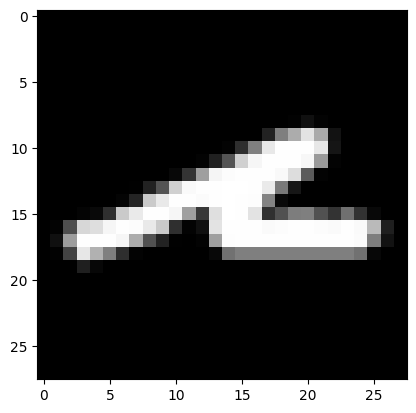

In [16]:
import matplotlib.pyplot as plt

index = 4  # Choose an image index
image = x_train[index].reshape(28, 28) 
plt.imshow(image, cmap='gray')
plt.show()


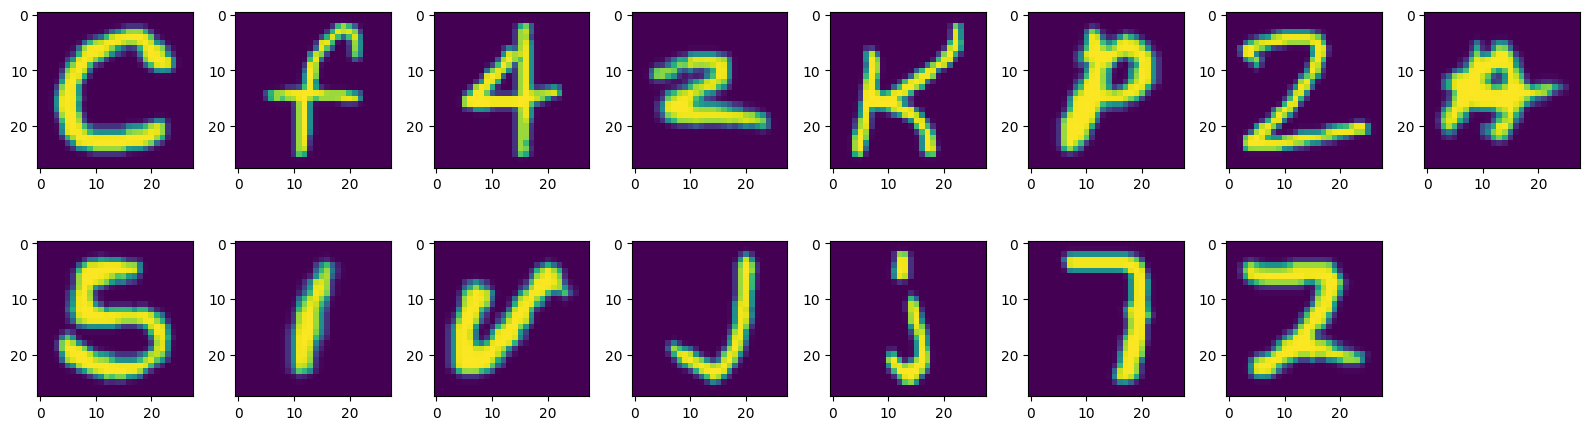

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define image transformation function
def transform_image(data):
    # Flip the image left to right
    image = np.fliplr(data)
    # Rotate the image by 90 degrees
    image = np.rot90(image)
    return image

# Function to create transformed images
def create_transformed_images(data, start, end):
    images = []
    for i in range(start, end):
        images.append(transform_image(data[i]))
    return images

# Generate transformed images
transformed_images = create_transformed_images(x_train, 115, 130)

# Determine the layout for subplots
rows = len(transformed_images) // 2
cols = (len(transformed_images) // 2) + 1
axes = []

# Plot the images
fig = plt.figure(figsize=(16, 16))
for a in range(rows + cols):
    axes.append(fig.add_subplot(rows, cols, a + 1))
    plt.imshow(transformed_images[a])

# Adjust the layout
fig.tight_layout()    

# Show the plot
plt.show()


In [18]:
# One hot encoding
train_y=y1
test_y=y2
train_y = to_categorical(train_y, classes)
test_y = to_categorical(test_y, classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112799, 47)
test_y:  (18799, 47)


# Splitting the data****

In [19]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x_train,train_y,test_size=0.2,random_state = 42)


In [20]:
#displaying shapes for split data for model testing and validation purpose
print('train_x:',train_x.shape)
print('train_y:',train_y.shape)
print('test_x:',test_x.shape)
print('test_y:',test_y.shape)

train_x: (90239, 28, 28, 1)
train_y: (90239, 47)
test_x: (22560, 28, 28, 1)
test_y: (22560, 47)


# CNN MODELS WITH DIFFERENT PARAMETERS

* I attempted to utilize Grid Search CV to validate the optimal parameters for this MLPP model; however, an issue was discovered with the tensorflow.keras.wrappers.scikit_learn import. KerasClassifier

# MODEL 1

In [22]:
number_of_classes = 47

def create_cnn(activation='relu', batch_norm=True, reg='L2', dropout=0.2):
    model = tf.keras.Sequential([
        # First Convolutional Layer
        tf.keras.layers.Conv2D(32, 3, activation=activation, input_shape=(28, 28, 1), 
                               kernel_regularizer=regularizers.L2(0.01)),  # L2 regularization
        tf.keras.layers.MaxPooling2D(2, 2),
        
        # Second Convolutional Layer
        tf.keras.layers.Conv2D(64, 3, activation=activation, kernel_regularizer=regularizers.L2(0.01)),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        # Flatten Layer
        tf.keras.layers.Flatten(),
        
        # First Dense Layer
        tf.keras.layers.Dense(512, activation=activation, kernel_regularizer=regularizers.L2(0.01)),  # L2 regularization
        
        # Add Batch Normalization if specified
        layers.BatchNormalization() if batch_norm else None,
        
        # Second Dense Layer
        tf.keras.layers.Dense(128, activation=activation, kernel_regularizer=regularizers.L2(0.01)),  # L2 regularization
        
        # Add Dropout if specified
        layers.Dropout(dropout) if dropout else None,
        
        # Output Layer
        tf.keras.layers.Dense(number_of_classes, activation='softmax')
    ])
    return model

# Create the model
model = create_cnn()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 912,303 (3.48 MB)

 Trainable params: 911,279 (3.48 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [26]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust optimizer and learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy']) 


In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
ES = EarlyStopping(monitor='val_accuracy', min_delta=0, verbose=0, restore_best_weights=True, patience=3, mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)


In [28]:

# Train the model and measure the training time
import time

start_time = time.time()
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])
end_time = time.time()

print("Training Time: {:.2f} seconds".format(end_time - start_time))

Epoch 1/10
  53/2820 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1963 - loss: 11.7945      

I0000 00:00:1724869743.599997     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724869743.622173     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2820/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6719 - loss: 2.8879

W0000 00:00:1724869755.024025     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724869755.976119     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.78085, saving model to Best_points.keras
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.6719 - loss: 2.8874 - val_accuracy: 0.7809 - val_loss: 1.0107 - learning_rate: 0.0010
Epoch 2/10
2800/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 1.0103
Epoch 2: val_accuracy improved from 0.78085 to 0.81702, saving model to Best_points.keras
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7860 - loss: 1.0100 - val_accuracy: 0.8170 - val_loss: 0.8488 - learning_rate: 0.0010
Epoch 3/10
2816/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.8736
Epoch 3: val_accuracy did not improve from 0.81702
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8105 - loss: 0.8736 - val_accuracy: 0.8021 - val_loss: 0.8400 - learning_rate: 0.0010
Epoch 4/10
2811/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8183 - loss: 0.8032
Epoch 4: val_accuracy did not improve from 0.81702
2820/2820 ━━━━━━━━━━━━━━━━

In [29]:
#Ghostnet model
import tensorflow as tf
from tensorflow.keras import layers, regularizers, optimizers
from tensorflow.keras.models import Model

def ghost_module(input, filters, kernel_size, ratio=2):
    init_channels = filters // ratio
    new_channels = init_channels * (ratio - 1)

    primary_conv = layers.Conv2D(init_channels, kernel_size=kernel_size, strides=1, padding='same', use_bias=False)(input)
    primary_conv = layers.BatchNormalization()(primary_conv)
    primary_conv = layers.ReLU()(primary_conv)

    cheap_operation = layers.DepthwiseConv2D(kernel_size=kernel_size, strides=1, padding='same', use_bias=False)(primary_conv)
    cheap_operation = layers.BatchNormalization()(cheap_operation)
    cheap_operation = layers.ReLU()(cheap_operation)

    output = layers.Concatenate()([primary_conv, cheap_operation])
    return output

def create_ghostnet(input_shape=(28, 28, 1), num_classes=47):
    inputs = tf.keras.Input(shape=input_shape)
    x = ghost_module(inputs, 32, 3)
    x = layers.MaxPooling2D(2, 2)(x)
    x = ghost_module(x, 64, 3)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model

# Create GhostNet model
ghostnet_model = create_ghostnet()
ghostnet_model.summary()

# Compile the GhostNet model
optimizer = optimizers.Adam(learning_rate=0.001)
ghostnet_model.compile(optimizer=optimizer,
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the GhostNet model
start_time = time.time()
history_ghostnet = ghostnet_model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y), callbacks=[MCP, ES, RLP])
end_time = time.time()

print("GhostNet Training Time: {:.2f} seconds".format(end_time - start_time))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │        144 │ input_layer_2[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d    │ (None, 28, 28,    │        144 │ re_lu[0][0]       │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │         64 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28,    │          0 │ re_lu[0][0],      │
│ (Concatenate)       │ 32)               │            │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │      9,216 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_1  │ (None, 14, 14,    │        288 │ re_lu_2[0][0]     │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        128 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 14, 14,    │          0 │ re_lu_2[0][0],    │
│ (Concatenate)       │ 64)               │            │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 7, 7, 64)  │          0 │ concatenate_1[0]

 Total params: 825,327 (3.15 MB)

 Trainable params: 825,135 (3.15 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
  45/2820 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0433 - loss: 4.6639 

W0000 00:00:1724870104.777291     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2820/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3112 - loss: 2.4178

W0000 00:00:1724870116.306808     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724870117.264201     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy did not improve from 0.83528
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.3113 - loss: 2.4176 - val_accuracy: 0.7824 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 2/10
2815/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5974 - loss: 1.2036
Epoch 2: val_accuracy did not improve from 0.83528
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5974 - loss: 1.2035 - val_accuracy: 0.8332 - val_loss: 0.4893 - learning_rate: 0.0010
Epoch 3/10
2807/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.9366
Epoch 3: val_accuracy improved from 0.83528 to 0.84393, saving model to Best_points.keras
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6877 - loss: 0.9363 - val_accuracy: 0.8439 - val_loss: 0.4343 - learning_rate: 0.0010
Epoch 4/10
2806/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7499 - loss: 0.7525
Epoch 4: val_accuracy improved from 0.84393 to 0.85324, saving model to Best_points.keras
2820/2820 ━━━━━━━━━━━━━

In [50]:
#SpiralNet model
import tensorflow as tf
from tensorflow.keras import layers, regularizers, optimizers, Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import time

# Example of a simplified graph convolutional layer
def graph_conv(input_tensor, output_dim, activation='relu'):
    x = layers.Dense(output_dim)(input_tensor)
    x = layers.BatchNormalization()(x)
    if activation:
        x = layers.Activation(activation)(x)
    return x

def create_spiralnet(input_shape=(28, 28, 1), num_classes=47):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Flatten()(inputs)
    x = graph_conv(x, 256)
    x = layers.Dropout(0.5)(x)
    x = graph_conv(x, 128)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model

# Create SpiralNet model
spiralnet_model = create_spiralnet()
spiralnet_model.summary()

# Compile the SpiralNet model
optimizer = optimizers.Adam(learning_rate=0.001)
spiralnet_model.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Callbacks
MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.0001)

# Train the SpiralNet model without EarlyStopping
start_time = time.time()
history_spiralnet_no_es = spiralnet_model.fit(
    train_x, train_y,
    epochs=10,
    validation_data=(test_x, test_y),
    callbacks=[MCP, RLP]  # Using only ModelCheckpoint and ReduceLROnPlateau
)
end_time = time.time()

print("SpiralNet Training Time without EarlyStopping: {:.2f} seconds".format(end_time - start_time))


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,455 (943.18 KB)

 Trainable params: 240,687 (940.18 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/10
  75/2820 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0658 - loss: 4.0709

W0000 00:00:1724872434.274385     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2820/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3714 - loss: 2.3258

W0000 00:00:1724872443.098944     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724872443.641746     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.72704, saving model to Best_points.keras
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.3714 - loss: 2.3256 - val_accuracy: 0.7270 - val_loss: 0.8942 - learning_rate: 0.0010
Epoch 2/10
2803/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5953 - loss: 1.3508
Epoch 2: val_accuracy improved from 0.72704 to 0.76161, saving model to Best_points.keras
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5954 - loss: 1.3505 - val_accuracy: 0.7616 - val_loss: 0.7576 - learning_rate: 0.0010
Epoch 3/10
2819/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 1.1970
Epoch 3: val_accuracy improved from 0.76161 to 0.77952, saving model to Best_points.keras
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6349 - loss: 1.1970 - val_accuracy: 0.7795 - val_loss: 0.6841 - learning_rate: 0.0010
Epoch 4/10
2798/2820 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6588 - loss: 1.1116
Epoch 4: val_accuracy improved from 0.

In [51]:
# Save the model in HDF5 format
model.save('mnist_project.h5')
